<a href="https://colab.research.google.com/github/dhairya-20/dhairya-20/blob/main/FinalAMAZON_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

CHECK FOR INSTALLATION

In [2]:
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [3]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

opendatasets is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from opendatasets) (4.66.4)

Requirement already satisfied: kaggle in /usr/local/lib/python3.10/dist-packages (from opendatasets) (1.6.14)

Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from opendatasets) (8.1.7)

Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi>=2023.7.22 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2024.7.4)

Requirement already satisfied: python-dateutil in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.8.2)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.31.0)

Requirement already satisfied: python-slugify in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (8.0.4)

Requirement already satisfied: urllib3 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.0.7)

Requirement already satisfied: bleach in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (6.1.0)

Requirement already satisfied: webencodings in /usr/local/lib/python3.10/dist-packages (from bleach->kaggle->opendatasets) (0.5.1)

Requirement already satisfied: text-unidecode>=1.3 in /usr/local/lib/python3.10/dist-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.3.2)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.7)

Installing collected packages: opendatasets

Successfully installed opendatasets-0.1.22

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhairya2002
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/irvifa/amazon-product-reviews


100%|██████████| 109M/109M [00:01<00:00, 90.9MB/s]


CREATING DATAFRAMES

In [4]:
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [5]:
df.shape

(7824482, 4)

In [6]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

TAKING SAMPLE DATA

In [7]:
electronics_data=df.sample(n=1564896,ignore_index=True)

FREE MEMORY TAKEN BY DATAFRAME

In [8]:
del df

PRINTING HEAD DATA

In [9]:
electronics_data.head()

,userId,productId,rating,timestamp
0,A3M0ZHNBPZQZI7,B000GDEZLQ,5.0,1168819200
1,A3DGHSETC845SS,B00727FE5U,1.0,1370563200
2,A1KKOU5ZCDZ3BG,B0048IATQ0,3.0,1302480000
3,A1LS7CE9186YIA,B0087NZ31S,2.0,1347235200
4,A1DMPKALTYIXLD,B0002CTETO,4.0,1300406400


In [10]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


DROP TIMESTAMP COL

In [11]:
electronics_data.drop('timestamp',axis=1,inplace=True)

In [12]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.010506e+00
std,1.382027e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


HANDLE MISSING DATA

In [13]:
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

Handle duplicate

In [14]:
electronics_data[electronics_data.duplicated()].shape[0]

0

In [15]:
electronics_data.head()

,userId,productId,rating
0,A3M0ZHNBPZQZI7,B000GDEZLQ,5.0
1,A3DGHSETC845SS,B00727FE5U,1.0
2,A1KKOU5ZCDZ3BG,B0048IATQ0,3.0
3,A1LS7CE9186YIA,B0087NZ31S,2.0
4,A1DMPKALTYIXLD,B0002CTETO,4.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

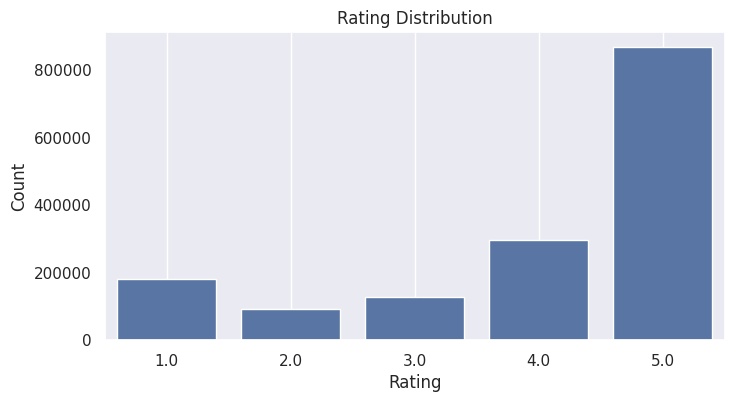

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [17]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225717
Total unique products :  237420


In [18]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     110
ADLVFFE4VBT8      107
A3OXHLG6DIBRW8     98
A6FIAB28IS79       88
A2AY4YUOX2N1BQ     77
Name: rating, dtype: int64

In [19]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 29 


In [20]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [21]:
data.head()

,userId,productId,rating
1,A3DGHSETC845SS,B00727FE5U,1.0
2,A1KKOU5ZCDZ3BG,B0048IATQ0,3.0
3,A1LS7CE9186YIA,B0087NZ31S,2.0
5,A182MA179PHZ5U,B00GR1I242,3.0
9,A30EN8U19TVH37,B00DR0PDNE,1.0


In [22]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [23]:
no_of_rating_per_product.head()

productId
B0074BW614    3529
B00DR0PDNE    3258
B007WTAJTO    2789
B0019EHU8G    2440
B003ELYQGG    2366
Name: rating, dtype: int64

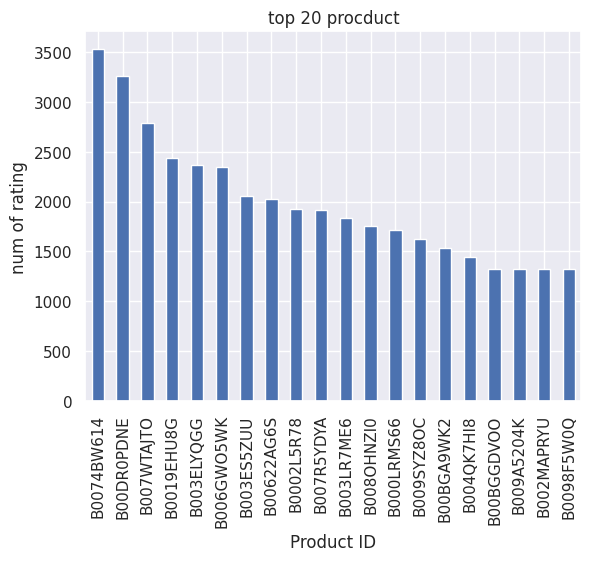

In [24]:
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [25]:
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [26]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.364583
1400501466,3.596491
1400532655,3.483871
140053271X,3.891089
B00000DM9W,4.584615


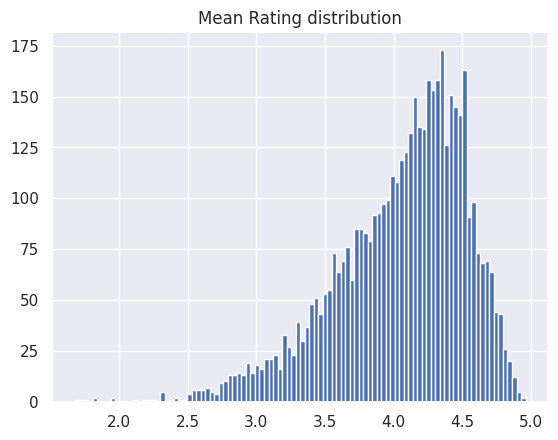

In [27]:
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [28]:
mean_rating_product_count['rating'].skew()

-0.91797698409816

In [29]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [30]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.364583,192
1400501466,3.596491,57
1400532655,3.483871,93
140053271X,3.891089,101
B00000DM9W,4.584615,65


In [31]:
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.470388,3529


In [32]:
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  122


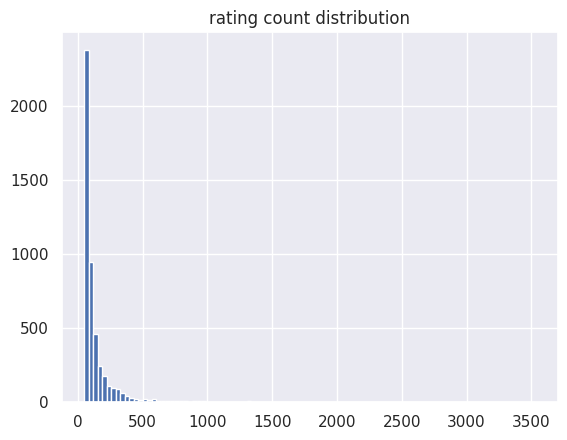

In [33]:
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

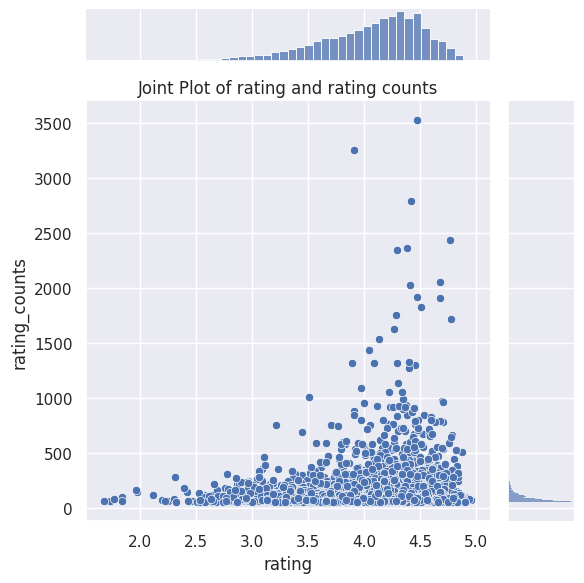

In [34]:
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

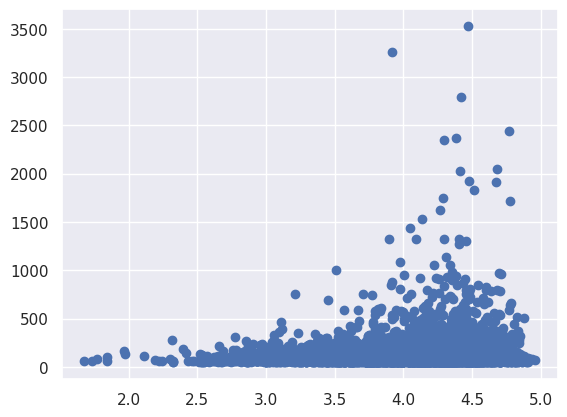

In [35]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [36]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.11710853716166637 


In [37]:
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


surprise is not installed. Installing...


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Collecting scikit-surprise (from surprise)

Downloading scikit_surprise-1.1.4.tar.gz (154 kB)

Output()

Installing build dependencies: started

Installing build dependencies: finished with status 'done'

Getting requirements to build wheel: started

Getting requirements to build wheel: finished with status 'done'

Preparing metadata (pyproject.toml): started

Preparing metadata (pyproject.toml): finished with status 'done'

Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.4.2)

Requirement already satisfied: numpy>=1.19.5 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.25.2)

Requirement already satisfied: scipy>=1.6.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.11.4)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (pyproject.toml): started

Building wheel for scikit-surprise (pyproject.toml): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357247 sha256=2aac8aa1140ea9aefc1c1639a69b9b8dd49d2bce8a32e1647491358a5387d47d

Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.4 surprise-0.1

In [38]:
#Reading the dataset
read = Reader(rating_scale=(1, 5))
surp_data = Dataset.load_from_df(data,read)

In [39]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surp_data, test_size=0.2,random_state=42)

In [40]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
al = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
al.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [41]:
#making predictions
test_pred = al.test(testset)

In [42]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True) #able to recommend product with good quality as rmse score is low.

Item-based Model : Test Set
RMSE: 1.3123


1.312253442432149

MODEL BASED COLLABORATIVE FILTERING

In [43]:
#Taking 20000 samples from dataset and puttimg it imto data2 dataframe.
data2=data.sample(20000)
ratings_mat = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0) #fill value 0 will put 0 if ratings are not present.To avoid NULL value
ratings_mat.head()

productId,0972683275,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000JI4F,B00000K135,B00001OWYM,...,B00HNGB1YS,B00HTPHK5W,B00HVLUR86,B00I2ZBD1U,B00I94IPTW,B00IGISO9C,B00INNP5VU,B00IO1V33U,B00IVPU786,B00IX2VGFA
userId,,,,,,,,,,,,,,,,,,,,,
A00015222LZ55IJSVL5IX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A006380437JJ6FP8V765X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01325941DWZ9PHWXDBYB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0192610J06ILO8ZU7I2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A040442875QQVTML38JY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


above we have created a pivot table of the ratings where the value of the column will rating and index will be userId and the column name will be productId

In [44]:
#check the shape of the rating_matrix
ratings_mat.shape

(19886, 4395)

RATINGS AVAILABLE FOR 4449 PRODUCTS AS OF NOW.

In [45]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_mat=ratings_mat.T
x_ratings_mat.head()

userId,A00015222LZ55IJSVL5IX,A006380437JJ6FP8V765X,A01325941DWZ9PHWXDBYB,A0192610J06ILO8ZU7I2,A040442875QQVTML38JY,A04679053BE8ZYGJ7SKRM,A053394018RTIZEUJHVHW,A055044435REDEJ8MWE4J,A060579313UJU2J9CPYLJ,A06174592MTVZB543AWIL,...,AZXSXO5R20T6F,AZXVT7BZOQM3V,AZY0O57SUE1V4,AZY10LLTJ71NX,AZYD3OVZIYJ1D,AZYJTD9J82V5I,AZYSA2ZSHWZIF,AZZ5VM01JRDQW,AZZTC2OYVNE2Q,AZZVV7G4PUYXA
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
x_ratings_mat.shape

(4395, 19886)

In [47]:
#Decomposition of the matrix using Singular Value Decomposition technique(SVD used mainly for recommendation task)
#TO REDUCE DIMENSION OF THE DATA.TO MAKE MORE PERFORMANCE ORIENTED AND ROBUST AND MAKING PREDICTION EASY.
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_mat)
decomposed_matrix.shape

(4395, 10)

In [48]:
#Correlation Matrix
corr_mat = np.corrcoef(decomposed_matrix)
corr_mat.shape

(4395, 4395)

In [49]:
x_ratings_mat.index[100]

'B00006I5J7'

In [50]:
i="B00001P4XH"
product_names=list(x_ratings_mat.index)
product_id=product_names.index(i)
print(product_id)

11


Correlation for all items with the item purchased by this customer are based on items rated by other customers people who bought the same product

In [51]:
correlation_product_ID = corr_mat[product_id]
correlation_product_ID.shape

(4395,)

In [52]:
corr_mat[correlation_product_ID>0.50].shape

(946, 4395)

In [53]:
# Get the indices of products with correlation greater than 0.75
recommended_indices = correlation_product_ID > 0.75

# Get the product IDs and corresponding ratings
recommended_products = x_ratings_mat.index[recommended_indices]
recommended_ratings = correlation_product_ID[recommended_indices]

# Create a DataFrame for a nicely formatted output
recommendations_df = pd.DataFrame({
    'Product ID': recommended_products,
    'Ratings': recommended_ratings
})

# Sort by correlation rating in descending order
recommendations_df_sorted = recommendations_df.sort_values(by='Ratings', ascending=False)

# Reset index to get proper sequence numbers
recommendations_df_sorted = recommendations_df_sorted.reset_index(drop=True)

print("The top 20 recommended products are as follows-: ")
print('-' * 60)  # Print a separator line before the output

# Print column names
print("Product ID\tRatings")
print('-' * 60)  # Print a separator line after column names

# Iterate and print each row with partitions
for index, row in recommendations_df_sorted.head(20).iterrows():
    print(f"{row['Product ID']}\t{row['Ratings']:.4f}")
    print('-' * 60)  # Print a separator line after each entry

The top 20 recommended products are as follows-: 
------------------------------------------------------------
Product ID	Ratings
------------------------------------------------------------
B00001P4XH	1.0000
------------------------------------------------------------
B000W9DJ1Q	0.9584
------------------------------------------------------------
B002GYPS3M	0.9534
------------------------------------------------------------
B004V67XU4	0.9516
------------------------------------------------------------
B005GGTTZ0	0.9510
------------------------------------------------------------
B002DGTGNG	0.9495
------------------------------------------------------------
B0071O4EZK	0.9482
------------------------------------------------------------
B000EVM5DK	0.9465
------------------------------------------------------------
B0002BRMNA	0.9446
------------------------------------------------------------
B0016RNX2I	0.9385
------------------------------------------------------------
B004NQMCDK	0.9377
-